Fiven a Boolean function, $f: {0,1}^n \longrightarrow {0,1}$ and the knowledge that the function is either constant or balanced. The task is to determine whether $f$ is constant or balanced.

# Classical Deterministic
Evaluate $f$ one by one for every element in ${0,1}^n$ in the hopes that you will get a different result for some input. If you find two elements such that $f(x) \neq f(y)$ then the function is balanced, else it is constant.

## Time Complexity
$\mathcal{O}(2^n)$

# Quantum

Since $f$ might be irreversible, it must be implemented as a quantum oracle $U_f$,
$$U_f |{x}\rangle|y\rangle = |{x}\rangle|y \oplus f(x)\rangle$$

I'll be working with x as 2 qubit system only. 

For simplicity, let's first take $f(x) = 1 \, \forall x$

The oracle for this will just apply not on the third qubit. I'll store this oracle in variable `oracle1`.

The second oracle is the uniform oracle, which is equal to 1, iff the second bit is 1. This is in `oracle2`

In [35]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit import Aer
from qiskit.visualization import plot_histogram
from math import sqrt

import matplotlib
oracle1 = QuantumCircuit(3) # Constant
oracle1.x(2)

oracle1.draw()
oracle2 = QuantumCircuit(3) #uniform

oracle2.cx(1,2)
oracle2.draw()

uniformOracle = oracle1.to_instruction()
qc = QuantumCircuit(3, 1)
qc.h([0,1])
qc.x(2)
qc.h(2)
qc.append(uniformOracle, [0,1,2])
qc.h([0,1])

qc.measure_all()
qc.draw()


┌───┐     ┌──────────────┐┌───┐ ░ ┌─┐      
   q_0: ┤ H ├─────┤0             ├┤ H ├─░─┤M├──────
        ├───┤     │              │├───┤ ░ └╥┘┌─┐   
   q_1: ┤ H ├─────┤1 circuit-264 ├┤ H ├─░──╫─┤M├───
        ├───┤┌───┐│              │└───┘ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├┤ H ├┤2             ├──────░──╫──╫─┤M├
        └───┘└───┘└──────────────┘      ░  ║  ║ └╥┘
   c: 1/═══════════════════════════════════╬══╬══╬═
                                           ║  ║  ║ 
meas: 3/═══════════════════════════════════╩══╩══╩═
                                           0  1  2

Originally, we are in the state 
$$C\times \left(|000\rangle + |001\rangle +  |010\rangle + |011\rangle - |100\rangle - |101\rangle - |110\rangle -|111\rangle \right) $$

We apply the oracle to get 
$$C\times \left(|f(00)00\rangle + |f(01)01\rangle +  |f(10)10\rangle + |f(11)11\rangle - |f(00)00\rangle - |f(01)01\rangle - |f(10)10\rangle -|f(11)11\rangle \right)$$

Now we apply the hadamard transform on the first 2 bits to get
$$C\times \left(|f(00)\rangle(|00\rangle + |01\rangle + |10\rangle + |11\rangle) + |f(01)\rangle (|00\rangle -|01\rangle + |10\rangle - |11\rangle) +  |f(10)\rangle (|00\rangle + |01\rangle - |10\rangle - |11\rangle) + |f(11)\rangle - |f(00)\rangle - |f(01)\rangle - |f(10)\rangle -|f(11)\rangle \right)$$

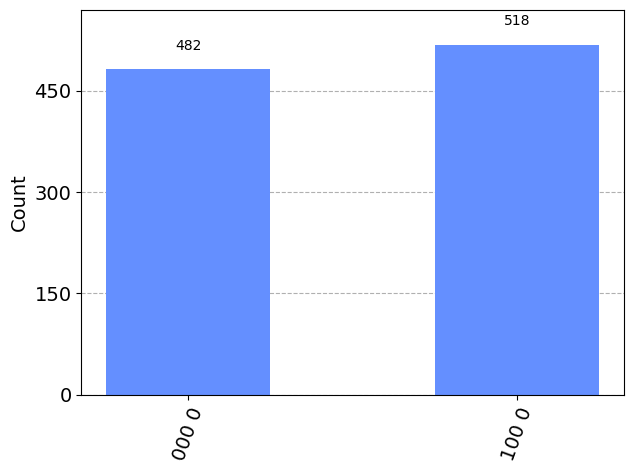

In [36]:
aer_sim = Aer.get_backend('aer_simulator')
job = aer_sim.run(qc.decompose(), shots=1000)
hist = job.result().get_counts()

plot_histogram(hist)
